In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv(r"D:\Project and code\ML\Sales\Train.csv")
df_test = pd.read_csv(r"D:\Project and code\ML\Sales\Test.csv")
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.shape

(8523, 12)

In [5]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df_train.duplicated().sum()

0

In [7]:
df_test.shape

(5681, 11)

In [8]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [9]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [12]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
df_train['Item_Weight'] = df_train['Item_Weight'].fillna(df_train['Item_Weight'].median())
df_test['Item_Weight'] = df_test['Item_Weight'].fillna(df_test['Item_Weight'].median())

In [14]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
# we use mode in this object 
df_train['Outlet_Size']= df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])
df_test['Outlet_Size']= df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0])

In [21]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [35]:
#sns.heatmap(df_train.corr(), annot=True, fmt = '.2f')

In [38]:
df_train = df_train.drop(columns= ['Item_Identifier','Outlet_Identifier'],axis=1)

In [40]:
df_train.sample(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8397,16.70,Regular,0.054851,Starchy Foods,64.4168,2009,Medium,Tier 3,Supermarket Type2,830.9184
6016,20.25,Low Fat,0.025932,Household,182.5976,1987,High,Tier 3,Supermarket Type1,3078.6592


In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [44]:
# List of numerical columns to check for outliers
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

# Function to detect outliers using IQR
def detect_outliers_iqr(df_train, columns):
    outliers = {}
    for col in columns:
        Q1 = df_train[col].quantile(0.25)
        Q3 = df_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
    return outliers

outlier_dict = detect_outliers_iqr(df_train, numerical_cols)

# Print the number of outliers per column
for col, outliers in outlier_dict.items():
    print(f"{col}: {len(outliers)} outliers")


Item_Weight: 0 outliers
Item_Visibility: 144 outliers
Item_MRP: 0 outliers
Outlet_Establishment_Year: 0 outliers
Item_Outlet_Sales: 186 outliers


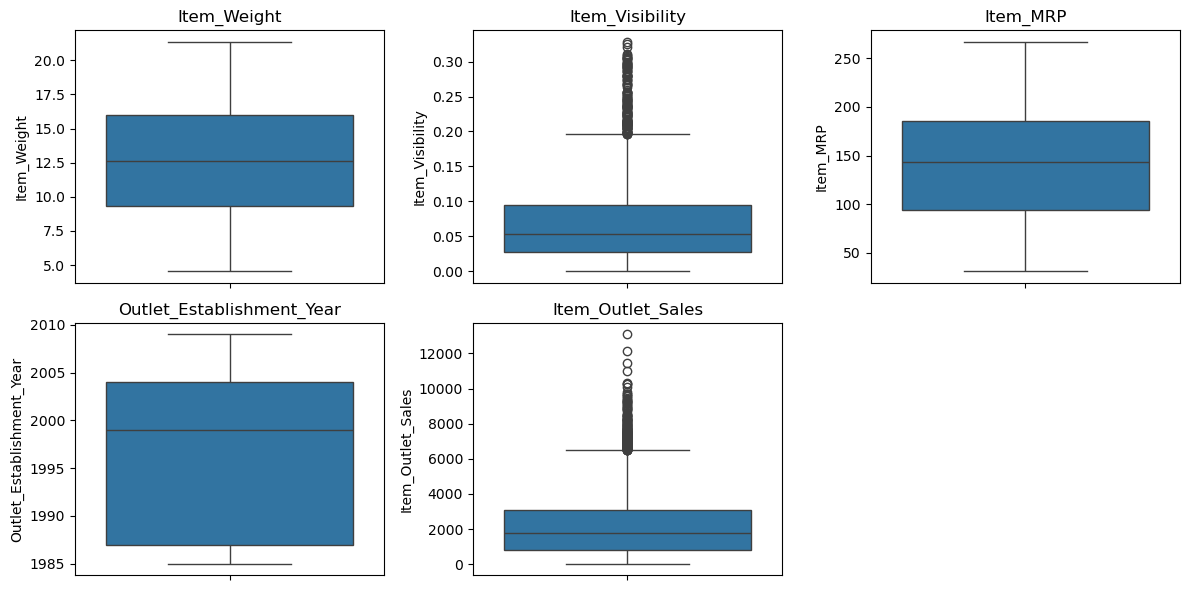

In [46]:
# Plot boxplots for numerical features
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [47]:
import dtale
dtale.show(df_train)

2025-03-14 17:26:19,257 - ERROR    - Exception on /health [GET]
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\anaconda\Lib\site-packages\flask\app.py", line 1473, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\anaconda\Lib\site-packages\flask\app.py", line 882, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\anaconda\Lib\site-packages\flask\app.py", line 878, in full_dispatch_request
    rv = self.preprocess_request()
         ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\anaconda\Lib\site-packages\flask\app.py", line 1253, in preprocess_request
    rv = self.ensure_sync(before_func)()
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\anaconda\Lib\site-packages\dash\dash.py", line 1413, in _setup_server
    self._generate_scripts_html()
  File "C:\Users\DELL\ana

In [48]:
#sns.heatmap(df_train[numerical_cols].corr(),annot = True, cmap = "coolwarm", fmt = '0.2f')

In [49]:
# we try to set outlier value inside the 
# Define function to cap outliers at the 1st and 99th percentile
def cap_outliers(df, col):
    lower_bound = df[col].quantile(0.01)  # 1st percentile
    upper_bound = df[col].quantile(0.99)  # 99th percentile
    df[col] = np.clip(df[col], lower_bound, upper_bound)

# Apply to both columns
cap_outliers(df_train, 'Item_Visibility')
cap_outliers(df_train, 'Item_Outlet_Sales')

print("Outliers capped successfully!")


Outliers capped successfully!


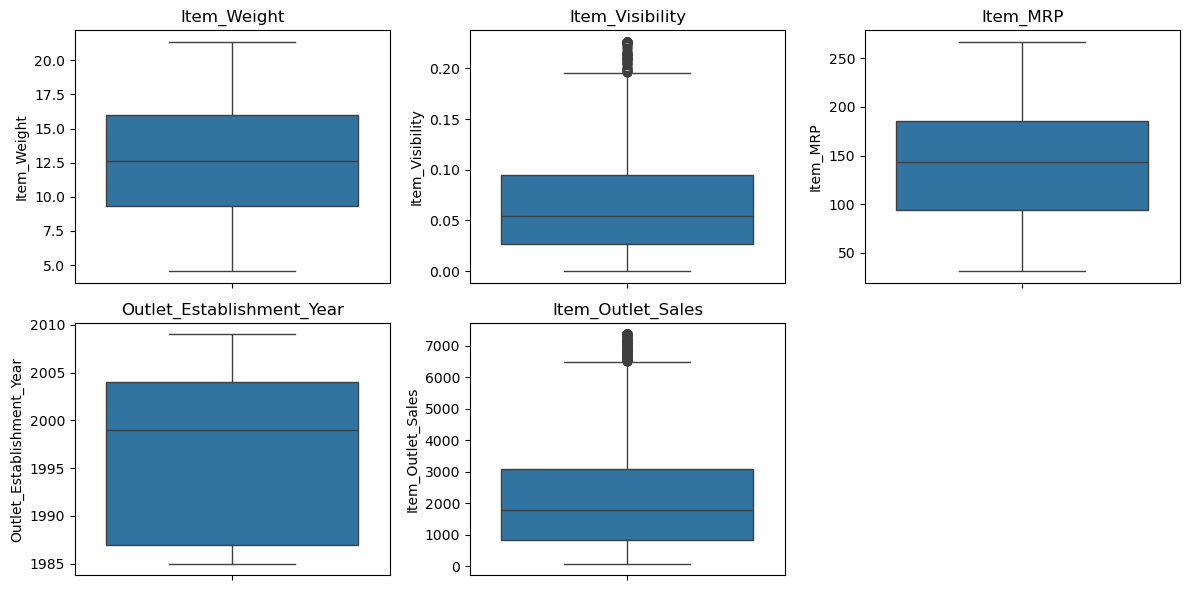

In [50]:
# Plot boxplots for numerical features
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [52]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df_train = remove_outliers(df_train, 'Item_Visibility')
df_train = remove_outliers(df_train, 'Item_Outlet_Sales')

print(f"Dataset size after removing outliers: {df_train.shape}")


Dataset size after removing outliers: (8193, 10)


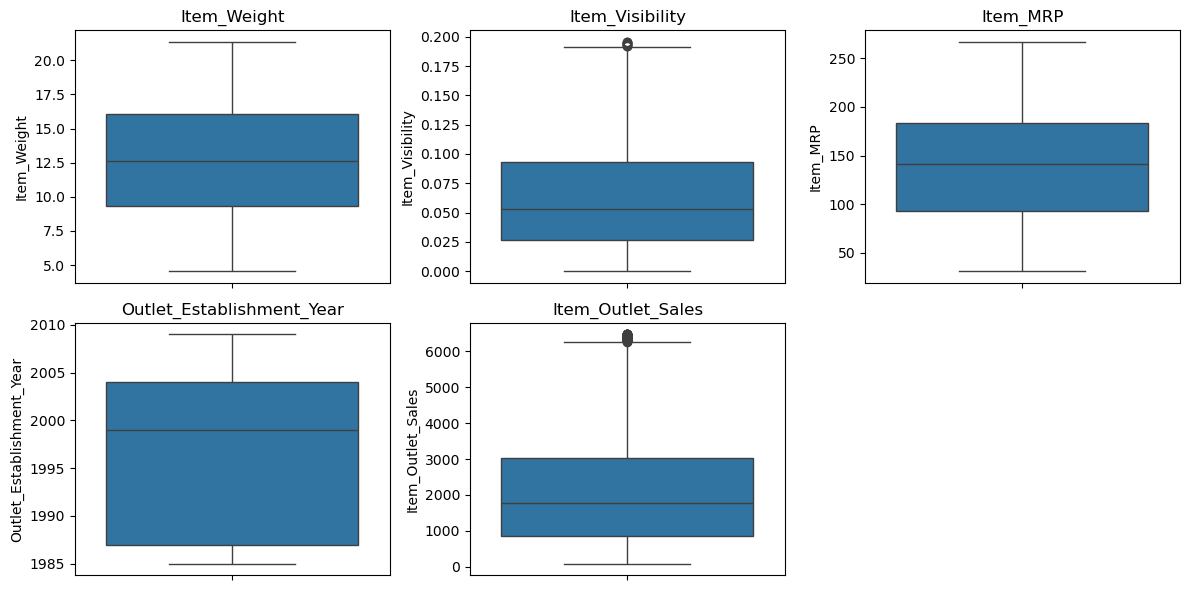

In [53]:
# Plot boxplots for numerical features
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [54]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [55]:
df_train.shape

(8193, 10)

In [95]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, r2_score

In [57]:
lb = LabelEncoder()
df_train = df_train.apply(lb.fit_transform)

In [58]:
scaler = StandardScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train))


In [65]:
df_train

,0,1,2,3,4,5,6,7,8,9
0,-0.138583,-0.57129,-1.261089,-0.768214,1.600958,0.046858,-0.277156,-1.368033,-0.261491,1.185115
1,-2.507370,0.97652,-1.170851,1.609565,-1.465258,1.520606,-0.277156,1.104840,1.036933,-1.232215
2,0.811019,-0.57129,-1.239397,0.658453,0.014305,0.046858,-0.277156,-1.368033,-0.261491,0.154834
3,0.988417,0.97652,-1.545253,-0.292659,0.815017,-0.321578,-0.277156,1.104840,-1.559916,-0.952061
4,-0.336852,-0.57129,-1.545253,0.420675,-1.371708,-1.058452,-1.937054,1.104840,-0.261491,-0.730224
...,...,...,...,...,...,...,...,...,...,...
8188,-1.797777,-0.57129,0.115043,1.371787,1.243992,-1.058452,-1.937054,1.104840,-0.261491,0.621376
8189,-0.670777,0.97652,-0.154804,-1.719326,-0.521144,0.415295,-0.277156,-0.131597,-0.261491,-1.125871
8190,0.017945,-0.57129,-0.568251,0.182897,-0.985200,0.783732,1.382742,-0.131597,-0.261491,-0.555271
8191,-1.547333,0.97652,1.497682,1.371787,-0.622695,1.520606,-0.277156,1.104840,1.036933,-0.042989


In [71]:
X = df_train.drop(columns = [9],axis = 1)
y = df_train[9]

In [73]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [75]:
df_train

,0,1,2,3,4,5,6,7,8,9
0,-0.138583,-0.57129,-1.261089,-0.768214,1.600958,0.046858,-0.277156,-1.368033,-0.261491,1.185115
1,-2.507370,0.97652,-1.170851,1.609565,-1.465258,1.520606,-0.277156,1.104840,1.036933,-1.232215
2,0.811019,-0.57129,-1.239397,0.658453,0.014305,0.046858,-0.277156,-1.368033,-0.261491,0.154834
3,0.988417,0.97652,-1.545253,-0.292659,0.815017,-0.321578,-0.277156,1.104840,-1.559916,-0.952061
4,-0.336852,-0.57129,-1.545253,0.420675,-1.371708,-1.058452,-1.937054,1.104840,-0.261491,-0.730224
...,...,...,...,...,...,...,...,...,...,...
8188,-1.797777,-0.57129,0.115043,1.371787,1.243992,-1.058452,-1.937054,1.104840,-0.261491,0.621376
8189,-0.670777,0.97652,-0.154804,-1.719326,-0.521144,0.415295,-0.277156,-0.131597,-0.261491,-1.125871
8190,0.017945,-0.57129,-0.568251,0.182897,-0.985200,0.783732,1.382742,-0.131597,-0.261491,-0.555271
8191,-1.547333,0.97652,1.497682,1.371787,-0.622695,1.520606,-0.277156,1.104840,1.036933,-0.042989


In [77]:
X_train.shape

(6554, 9)

In [145]:
!pip install scikit-learn==1.2.2  

     ---------------------------------------- 0.0/7.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.3 MB 330.3 kB/s eta 0:00:22
     ---------------------------------------- 0.0/7.3 MB 281.8 kB/s eta 0:00:26
      --------------------------------------- 0.1/7.3 MB 714.4 kB/s eta 0:00:10
     --- ------------------------------------ 0.6/7.3 MB 2.8 MB/s eta 0:00:03
     ---- ----------------------------------- 0.7/7.3 MB 3.3 MB/s eta 0:00:02
     ----- ---------------------------------- 1.0/7.3 MB 3.3 MB/s eta 0:00:02
     ------- -------------------------------- 1.4/7.3 MB 4.0 MB/s eta 0:00:02
     ----------- ---------------------------- 2.0/7.3 MB 5.1 MB/s eta 0:00:02
     ------------ --------------------------- 2.2/7.3 MB 5.2 MB/s eta 0:00:01
     ---

  You can safely remove it manually.


In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [147]:
gd = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators= 700)
gd.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=700)

In [148]:
y_pred = gd.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2


0.6306766475521691

In [155]:
import pickle
with open("GBSales9.pkl","wb") as f:
    pickle.dump(gd,f)

In [153]:
print(type(gd))  

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>


In [139]:
import joblib
joblib.dump(gd, "GBSales1.pkl")  # Use the actual model variable


['GBSales1.pkl']

In [141]:
import sklearn
print(sklearn.__version__)

1.4.2


In [94]:
models = {
    "Linear Regression" : LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boost" : GradientBoostingRegressor(learning_rate=0.1,random_state=42,max_depth=3),
    "XGBoost" : XGBRegressor(random_state=42)
}

In [110]:
hyperparameters = {
     "Linear Regression": {
        "fit_intercept": [True, False]  
    },
    "Random Forest":{
        "n_estimators": [50,100,200,300,500,700,1000],
        "max_depth" : [5,10,None]
    },
    "Gradient Boost" :{
        "learning_rate" : [0.01,0.1,0.2],
        "n_estimators": [50,100,200,300,500,700,1000],
        "max_depth" : [3,5,7]
        
    },
    "XGBoost" :{
        "learning_rate" : [0.01,0.1,0.2],
        "n_estimators": [50,100,200,300,500,700,1000],
        "max_depth" : [3,5,7]
    }
}

In [112]:
from sklearn.model_selection import GridSearchCV
best_models = {}
for model_name, model in models.items():
    if model_name not in hyperparameters:
        print(f"⚠️ Skipping {model_name} (No hyperparameters found)")
        continue
    print(f"🔍 Tuning {model_name}...")
    grid = GridSearchCV(
        estimator=model,
        param_grid=hyperparameters[model_name],
        cv=5,
        scoring="r2",  
        n_jobs=-1 
    )
    grid.fit(X_train_scaler, y_train)
    best_models[model_name] = grid.best_estimator_
    print(f"✅ Best Parameters for {model_name}: {grid.best_params_}")
    print(f"🏆 Best Accuracy for {model_name}: {grid.best_score_:.2f}\n")

🔍 Tuning Linear Regression...
✅ Best Parameters for Linear Regression: {'fit_intercept': True}
🏆 Best Accuracy for Linear Regression: 0.52

🔍 Tuning Random Forest...
✅ Best Parameters for Random Forest: {'max_depth': 5, 'n_estimators': 1000}
🏆 Best Accuracy for Random Forest: 0.63

🔍 Tuning Gradient Boost...
✅ Best Parameters for Gradient Boost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
🏆 Best Accuracy for Gradient Boost: 0.63

🔍 Tuning XGBoost...
✅ Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 700}
🏆 Best Accuracy for XGBoost: 0.63



In [125]:
import pickle
with open("Gradientsales.pkl","wb") as f:
    pickle.dump('Gradient Boost',f)

In [129]:
df_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [145]:
import joblib
from sklearn.ensemble import GradientBoostingRegressor

# Train the model (example)
model = GradientBoostingRegressor()
model.fit(X_train_scaler, y_train) 


GradientBoostingRegressor()

In [147]:
y_pred = model.predict(X_test)

C:\Users\DELL\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but GradientBoostingRegressor was fitted without feature names



In [137]:
joblib.dump(model, "Gradientsales1.pkl")

['Gradientsales1.pkl']